<a href="https://colab.research.google.com/github/Yacarta/Ai_Python1900/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модуля pandas

In [52]:
import pandas as pd


Дані про пасажирів корабля:
* pclass -- клас білета(перший, другий або третій)
* sex -- стать
* age -- вік
* sibsp -- кількість братів\сестер та чоловіків\дружин на борту
* parch -- кількість дітей та батьків на борту
* fare -- вартість поїздки
* embarked -- Порт посадки (C = Шербур, Q = Квінстаун, S = Саутгемптон)


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання 1

Вивести загальну інформацію про таблицю: кількість рядків та стовпців, назви стовпців та їхній тип даних, в яких стовпцях є пропущені значення

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [8]:
df.isnull().sum().sort_values(ascending=False)


,0
age,177
embarked,2
pclass,0
sex,0
sibsp,0
parch,0
fare,0


# Завдання 2
Скільки пасажирів сіло у Квінстауні?

In [11]:
mask=df['embarked']=='Q'
mask.sum()


np.int64(77)

In [14]:
df[mask]

,pclass,sex,age,sibsp,parch,fare,embarked
5,3,male,NaN,0,0,8.4583,Q
16,3,male,2.0,4,1,29.1250,Q
22,3,female,15.0,0,0,8.0292,Q
28,3,female,NaN,0,0,7.8792,Q
32,3,female,NaN,0,0,7.7500,Q
...,...,...,...,...,...,...,...
790,3,male,NaN,0,0,7.7500,Q
825,3,male,NaN,0,0,6.9500,Q
828,3,male,NaN,0,0,7.7500,Q
885,3,female,39.0,0,5,29.1250,Q


# Завдання 3
Виведіть стать, вік та вартість поїздки для пасажирів з білетом першого класу

In [19]:
mask1class = df['pclass']==1
df[mask1class]
columns=['sex', 'age', 'fare', 'pclass']
df[mask1class][columns]

,sex,age,fare,pclass
1,female,38.0,71.2833,1
3,female,35.0,53.1000,1
6,male,54.0,51.8625,1
11,female,58.0,26.5500,1
23,male,28.0,35.5000,1
...,...,...,...,...
871,female,47.0,52.5542,1
872,male,33.0,5.0000,1
879,female,56.0,83.1583,1
887,female,19.0,30.0000,1


# Завдання 4
Ввиведіть дані про неповнолітніх чоловіків з Шербура

In [24]:
mask_sher = df['embarked']=='C'
mask_sher
mask_age = df['age']<18
mask_age
mask_s = df['sex']=='male'
mask_s
mask = mask_sher & mask_age & mask_s
df[mask]

,pclass,sex,age,sibsp,parch,fare,embarked
125,3,male,12.00,1,0,11.2417,C
352,3,male,15.00,1,1,7.2292,C
532,3,male,17.00,1,1,7.2292,C
550,1,male,17.00,0,2,110.8833,C
731,3,male,11.00,0,0,18.7875,C
803,3,male,0.42,0,1,8.5167,C
827,2,male,1.00,0,2,37.0042,C


# Завдання 5
Створіть новий стовпчик relatives -- загальна кількість родичів на борту для кожного пасажира

In [28]:
df['relatives'] = df['parch'] + df['sibsp']
df.sort_values(by='relatives')

,pclass,sex,age,sibsp,parch,fare,embarked,relatives
872,1,male,33.0,0,0,5.0000,S,0
873,3,male,47.0,0,0,9.0000,S,0
26,3,male,NaN,0,0,7.2250,C,0
28,3,female,NaN,0,0,7.8792,Q,0
29,3,male,NaN,0,0,7.8958,S,0
...,...,...,...,...,...,...,...,...
180,3,female,NaN,8,2,69.5500,S,10
201,3,male,NaN,8,2,69.5500,S,10
792,3,female,NaN,8,2,69.5500,S,10
846,3,male,NaN,8,2,69.5500,S,10


# Завдання 6
Видаліть стовпчик, в якому найбільше пропусків. Якщо пропущені значення ще залишаться, видаліть рядки з пропусками

In [33]:
df.isnull().mean()

,0
pclass,0.000000
sex,0.000000
age,0.198653
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.002245
relatives,0.000000


In [44]:
column_nun = df.isnull().sum().idxmax()


In [45]:
df.drop(columns= column_nun, inplace=True)


In [46]:
df.isnull().sum()

,0
pclass,0
sex,0
sibsp,0
parch,0
fare,0
embarked,2
relatives,0


In [49]:
df.dropna(inplace=True)
df.isnull().sum()


,0
pclass,0
sex,0
sibsp,0
parch,0
fare,0
embarked,0
relatives,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     889 non-null    int64  
 1   sex        889 non-null    object 
 2   sibsp      889 non-null    int64  
 3   parch      889 non-null    int64  
 4   fare       889 non-null    float64
 5   embarked   889 non-null    object 
 6   relatives  889 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


In [51]:
df

,pclass,sex,sibsp,parch,fare,embarked,relatives
0,3,male,1,0,7.2500,S,1
1,1,female,1,0,71.2833,C,1
2,3,female,0,0,7.9250,S,0
3,1,female,1,0,53.1000,S,1
4,3,male,0,0,8.0500,S,0
...,...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S,0
887,1,female,0,0,30.0000,S,0
888,3,female,1,2,23.4500,S,3
889,1,male,0,0,30.0000,C,0


<Axes: >

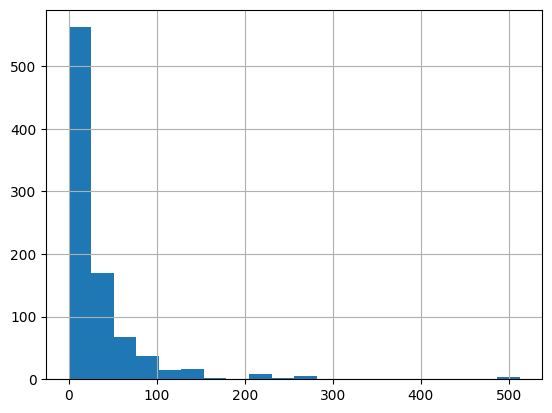

In [55]:
df['fare'].hist(bins=20)

In [56]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Гістограма ціни')

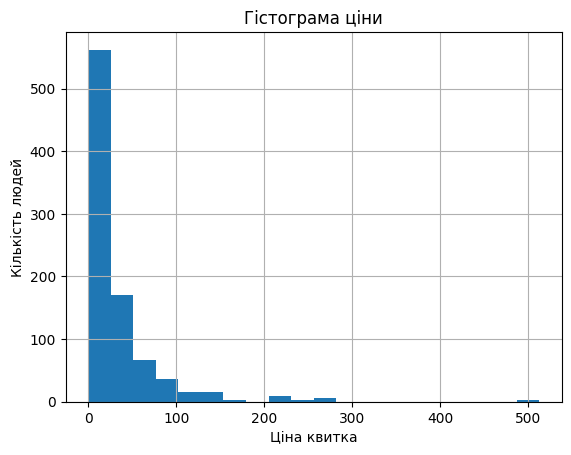

In [60]:
df['fare'].hist(bins=20)
plt.xlabel('Ціна квитка')
plt.ylabel('Кількість людей')
plt.title('Гістограма ціни')


In [63]:
mask =df['fare']>200
mask.sum()
df[mask]

,pclass,sex,sibsp,parch,fare,embarked,relatives
27,1,male,3,2,263.0000,S,5
88,1,female,3,2,263.0000,S,5
118,1,male,0,1,247.5208,C,1
258,1,female,0,0,512.3292,C,0
299,1,female,0,1,247.5208,C,1
311,1,female,2,2,262.3750,C,4
341,1,female,3,2,263.0000,S,5
377,1,male,0,2,211.5000,C,2
380,1,female,0,0,227.5250,C,0
438,1,male,1,4,263.0000,S,5
